In [31]:
import watershed2d

In [32]:
w = watershed2d.Ws2d(filename)

No object prediction file (/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1_Object Predictions.h5) found - segmenting without.


In [1]:
# %matplotlib notebook

In [2]:
import sys
# sys.path.append('/Users/jakob/Documents/RU/Code/segment')
import watershed3d
# from imutils import random_cmap
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step
# import imutils

load file 

In [3]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
w = watershed3d.Ws3d(filename)

No object prediction file (/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1_Object Predictions.h5) found - segmenting without.


check histogram of image data

In [4]:
# w.intensity_histogram()

load Ilastik probability mask and plot it

In [5]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

shape (16, 964, 963) (16, 964, 963)
loaded probability map


do segmentation without the object classifier

In [6]:
w.segment(do_not_use_object_classifier=1, sigma=(2,6,6), min_distance=1)

(16, 964, 963)
len rp= 654
segmentation done, found 669 cells


show segmentation

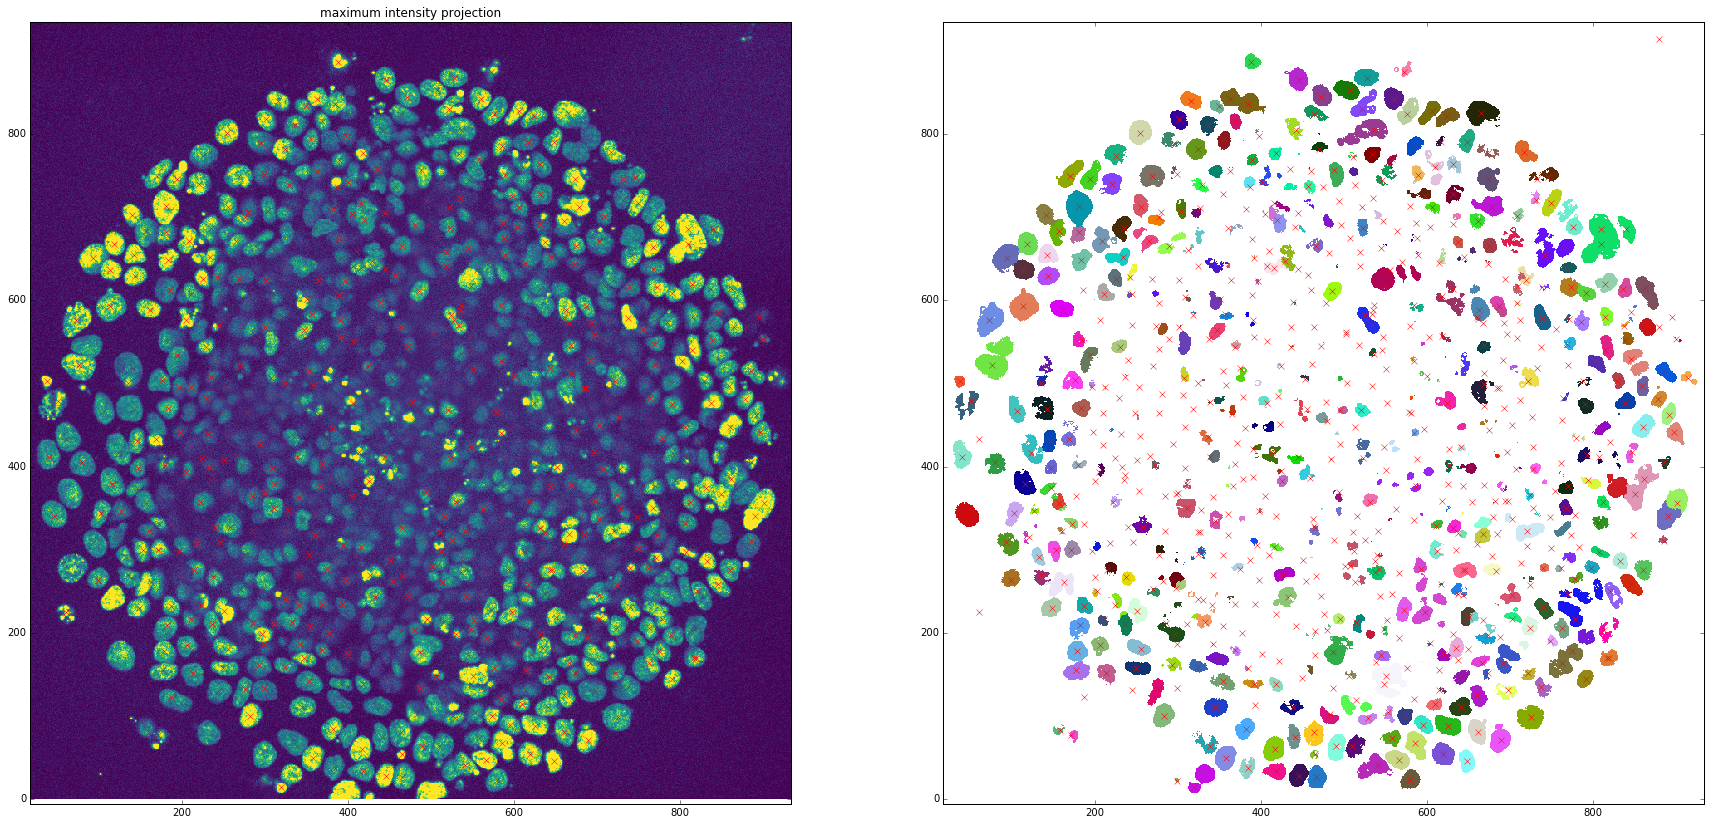

In [7]:
w.show_segmentation(z=12,figsize=(30,20))

In [8]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
1,3786,5563825.0,1469.578711,"[5.64368726889, 245.785525621, 641.2120972]"
2,1,1681.0,1681.000000,"[1.0, 309.0, 246.0]"
3,943,1487314.0,1577.215270,"[2.30858960764, 382.772004242, 233.074231177]"
4,1876,3263149.0,1739.418443,"[2.36513859275, 553.073560768, 290.018123667]"
5,5817,9865764.0,1696.022692,"[3.40433212996, 278.164861613, 564.78820698]"


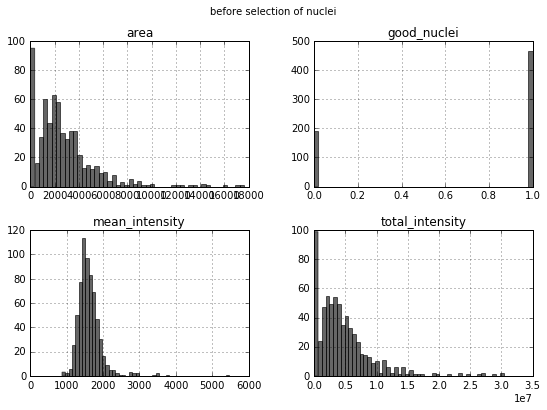

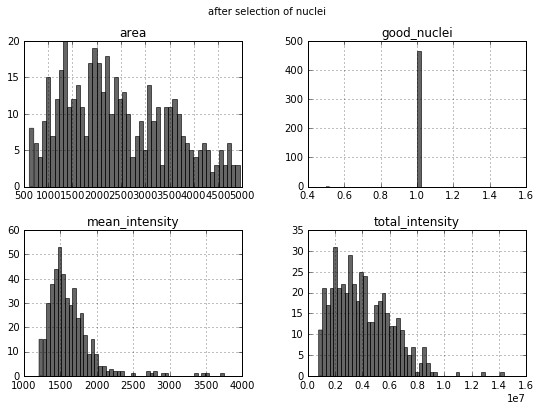

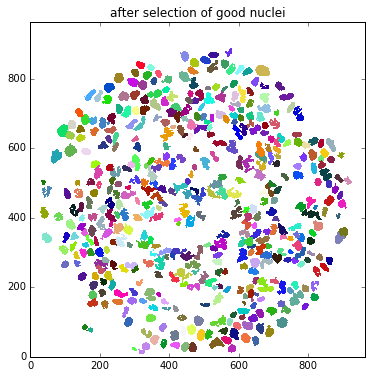

In [9]:
w.select_nuclei(quantiles=[0.2,0.85], cutoff=[600,5000], plot=1)

apply to other channels

In [10]:
# filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c2.tif'
# filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c3.tif'
# filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c4.tif'
# filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c2.tif'
# filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c3_bs.tif'
# filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c4.tif'
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c3.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c4.tif'

/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py:599: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return im - np.partition(imm[imm.nonzero()], n)[:n].mean()


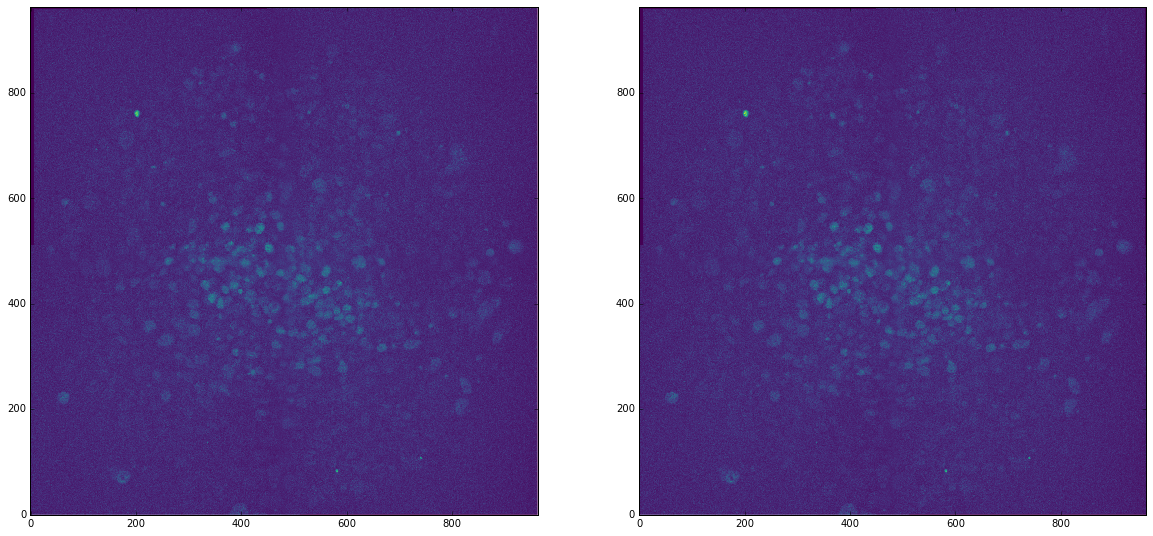

In [11]:
s2=tiff.imread(filename_sox2)
_,ax=subplots(1,2, figsize=(20,10))
ax[0].imshow(s2[9], cmap='viridis', origin='lower')
ax[1].imshow(w.remove_background(s2,2e5)[9], cmap='viridis', origin='lower')

In [12]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox17, 'sox17')

len rp= 654
len rp= 654
len rp= 654


In [13]:
# w.df.drop('good_nuclei', axis=1, inplace=1)

In [14]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,good_nuclei,sox2,bra,sox17
cell_id,,,,,,,,
1,3786,5563825.0,1469.578711,"[5.64368726889, 245.785525621, 641.2120972]",True,8.164903e+05,480153.979750,92915.660125
2,1,1681.0,1681.000000,"[1.0, 309.0, 246.0]",False,2.147579e+02,157.460375,72.044813
3,943,1487314.0,1577.215270,"[2.30858960764, 382.772004242, 233.074231177]",True,1.973077e+05,71619.133625,33498.258188
4,1876,3263149.0,1739.418443,"[2.36513859275, 553.073560768, 290.018123667]",True,5.406138e+05,104332.663500,44538.068250
5,5817,9865764.0,1696.022692,"[3.40433212996, 278.164861613, 564.78820698]",False,1.325916e+06,464892.001375,139542.674313


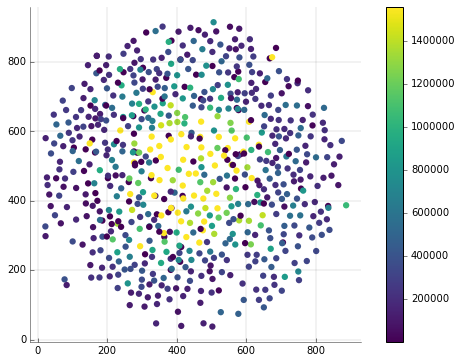

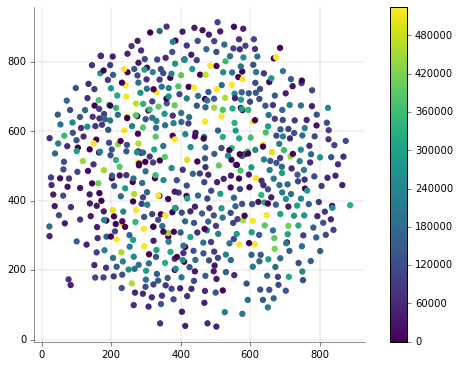

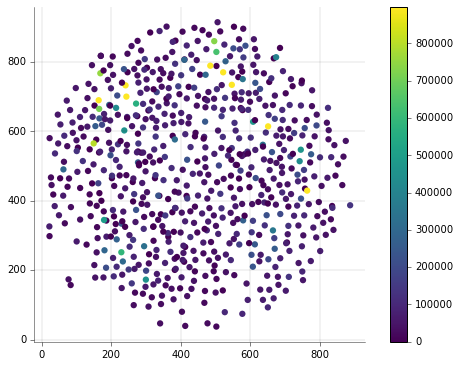

In [15]:
w.dot_plot('sox2', colormap_cutoff=0.2)
w.dot_plot('bra', colormap_cutoff=0.3)
w.dot_plot('sox17', colormap_cutoff=0.5)

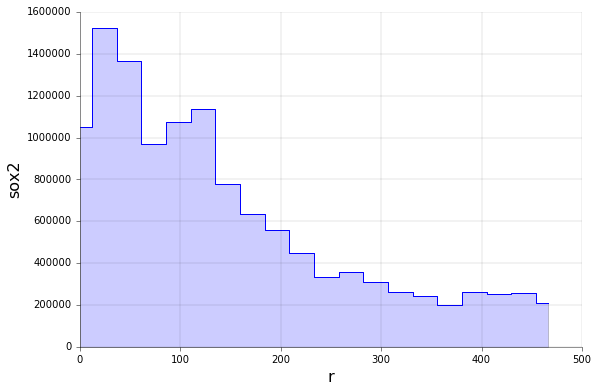

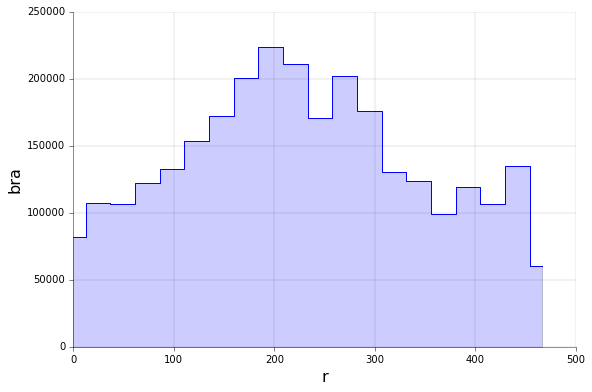

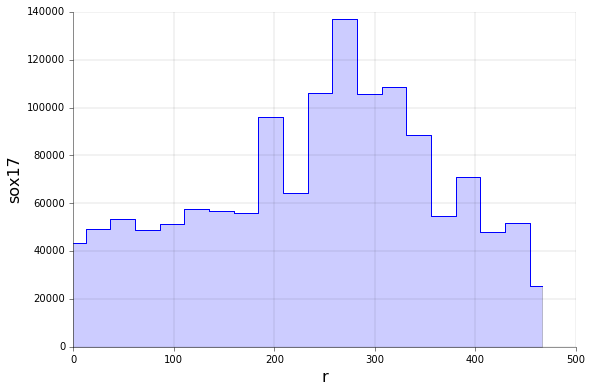

In [16]:
w.radial_profile_per_cell('sox2',20, only_selected_cells=1);
w.radial_profile_per_cell('bra',20, only_selected_cells=1);
w.radial_profile_per_cell('sox17',20, only_selected_cells=1);

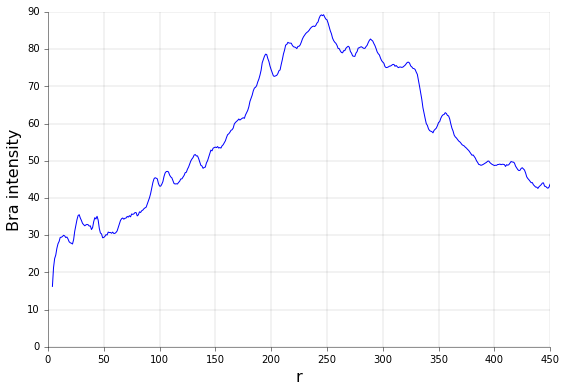

In [17]:
r,rs = w.radial_intensity('bra', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Bra intensity', fontsize=16)
w.nice_spines(ax)

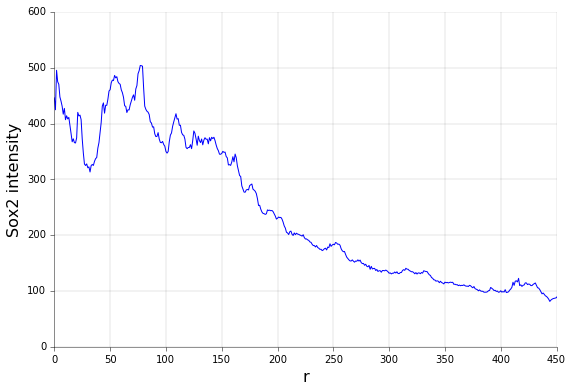

In [18]:
r,rs = w.radial_intensity('sox2', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,rs)
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Sox2 intensity', fontsize=16)
w.nice_spines(ax)

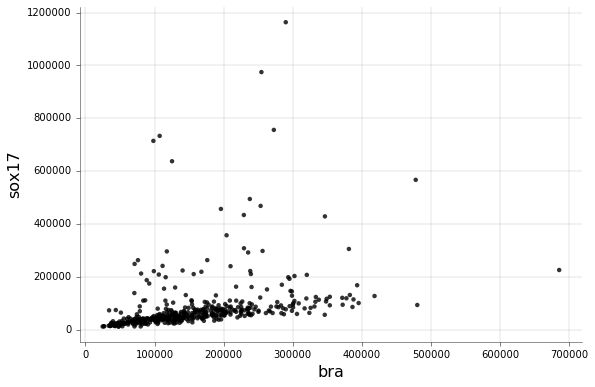

In [19]:
w.coexpression_per_cell('bra', 'sox17', only_selected_cells=1)

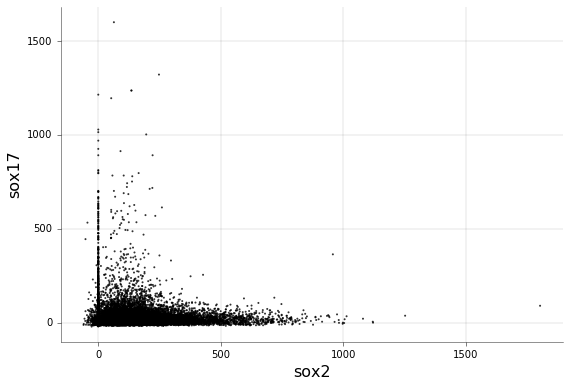

In [28]:
w.coexpression_per_pixel('sox2', 'sox17', downsample=100, only_selected_cells=0)

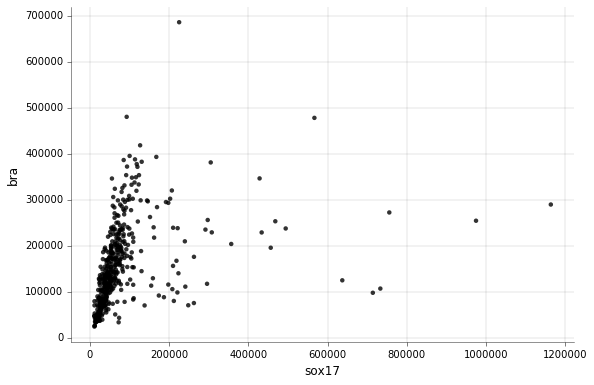

In [21]:
ch1 = w.df['sox17'][w.df.good_nuclei].values
ch2 = w.df['bra'][w.df.good_nuclei].values
fig,ax = subplots()
ax.scatter(ch1,ch2, edgecolors='none', c='k', alpha=0.8)
w.nice_spines(ax)
ax.autoscale(tight=1)
ax.set_xlabel('sox17')
ax.set_ylabel('bra')